### Question #1 on page 552 of ISLR Python.   

Conceptual
1. This problem involves the K-means clustering algorithm.
(a) Prove (12.18).
(b) On the basis of this identity, argue that the K-means clustering
algorithm (Algorithm 12.2) decreases the objective (12.17) at
each iteration.
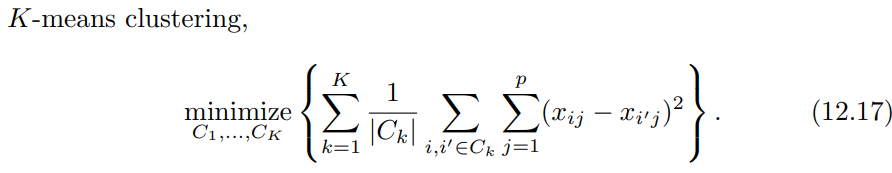



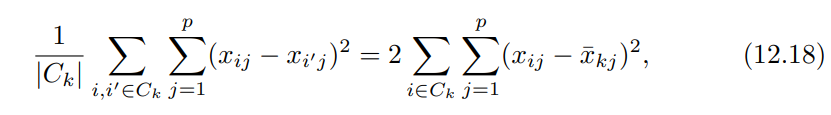

On the left hand side we compute the difference between each observation (indexed by i and  i′). In the second we compute the difference between each observation and the mean. Intuitively this identity is clear (the factor of 2 is present because we calculate the difference between each pair twice). However, to prove, the picture below elaborate this proof.

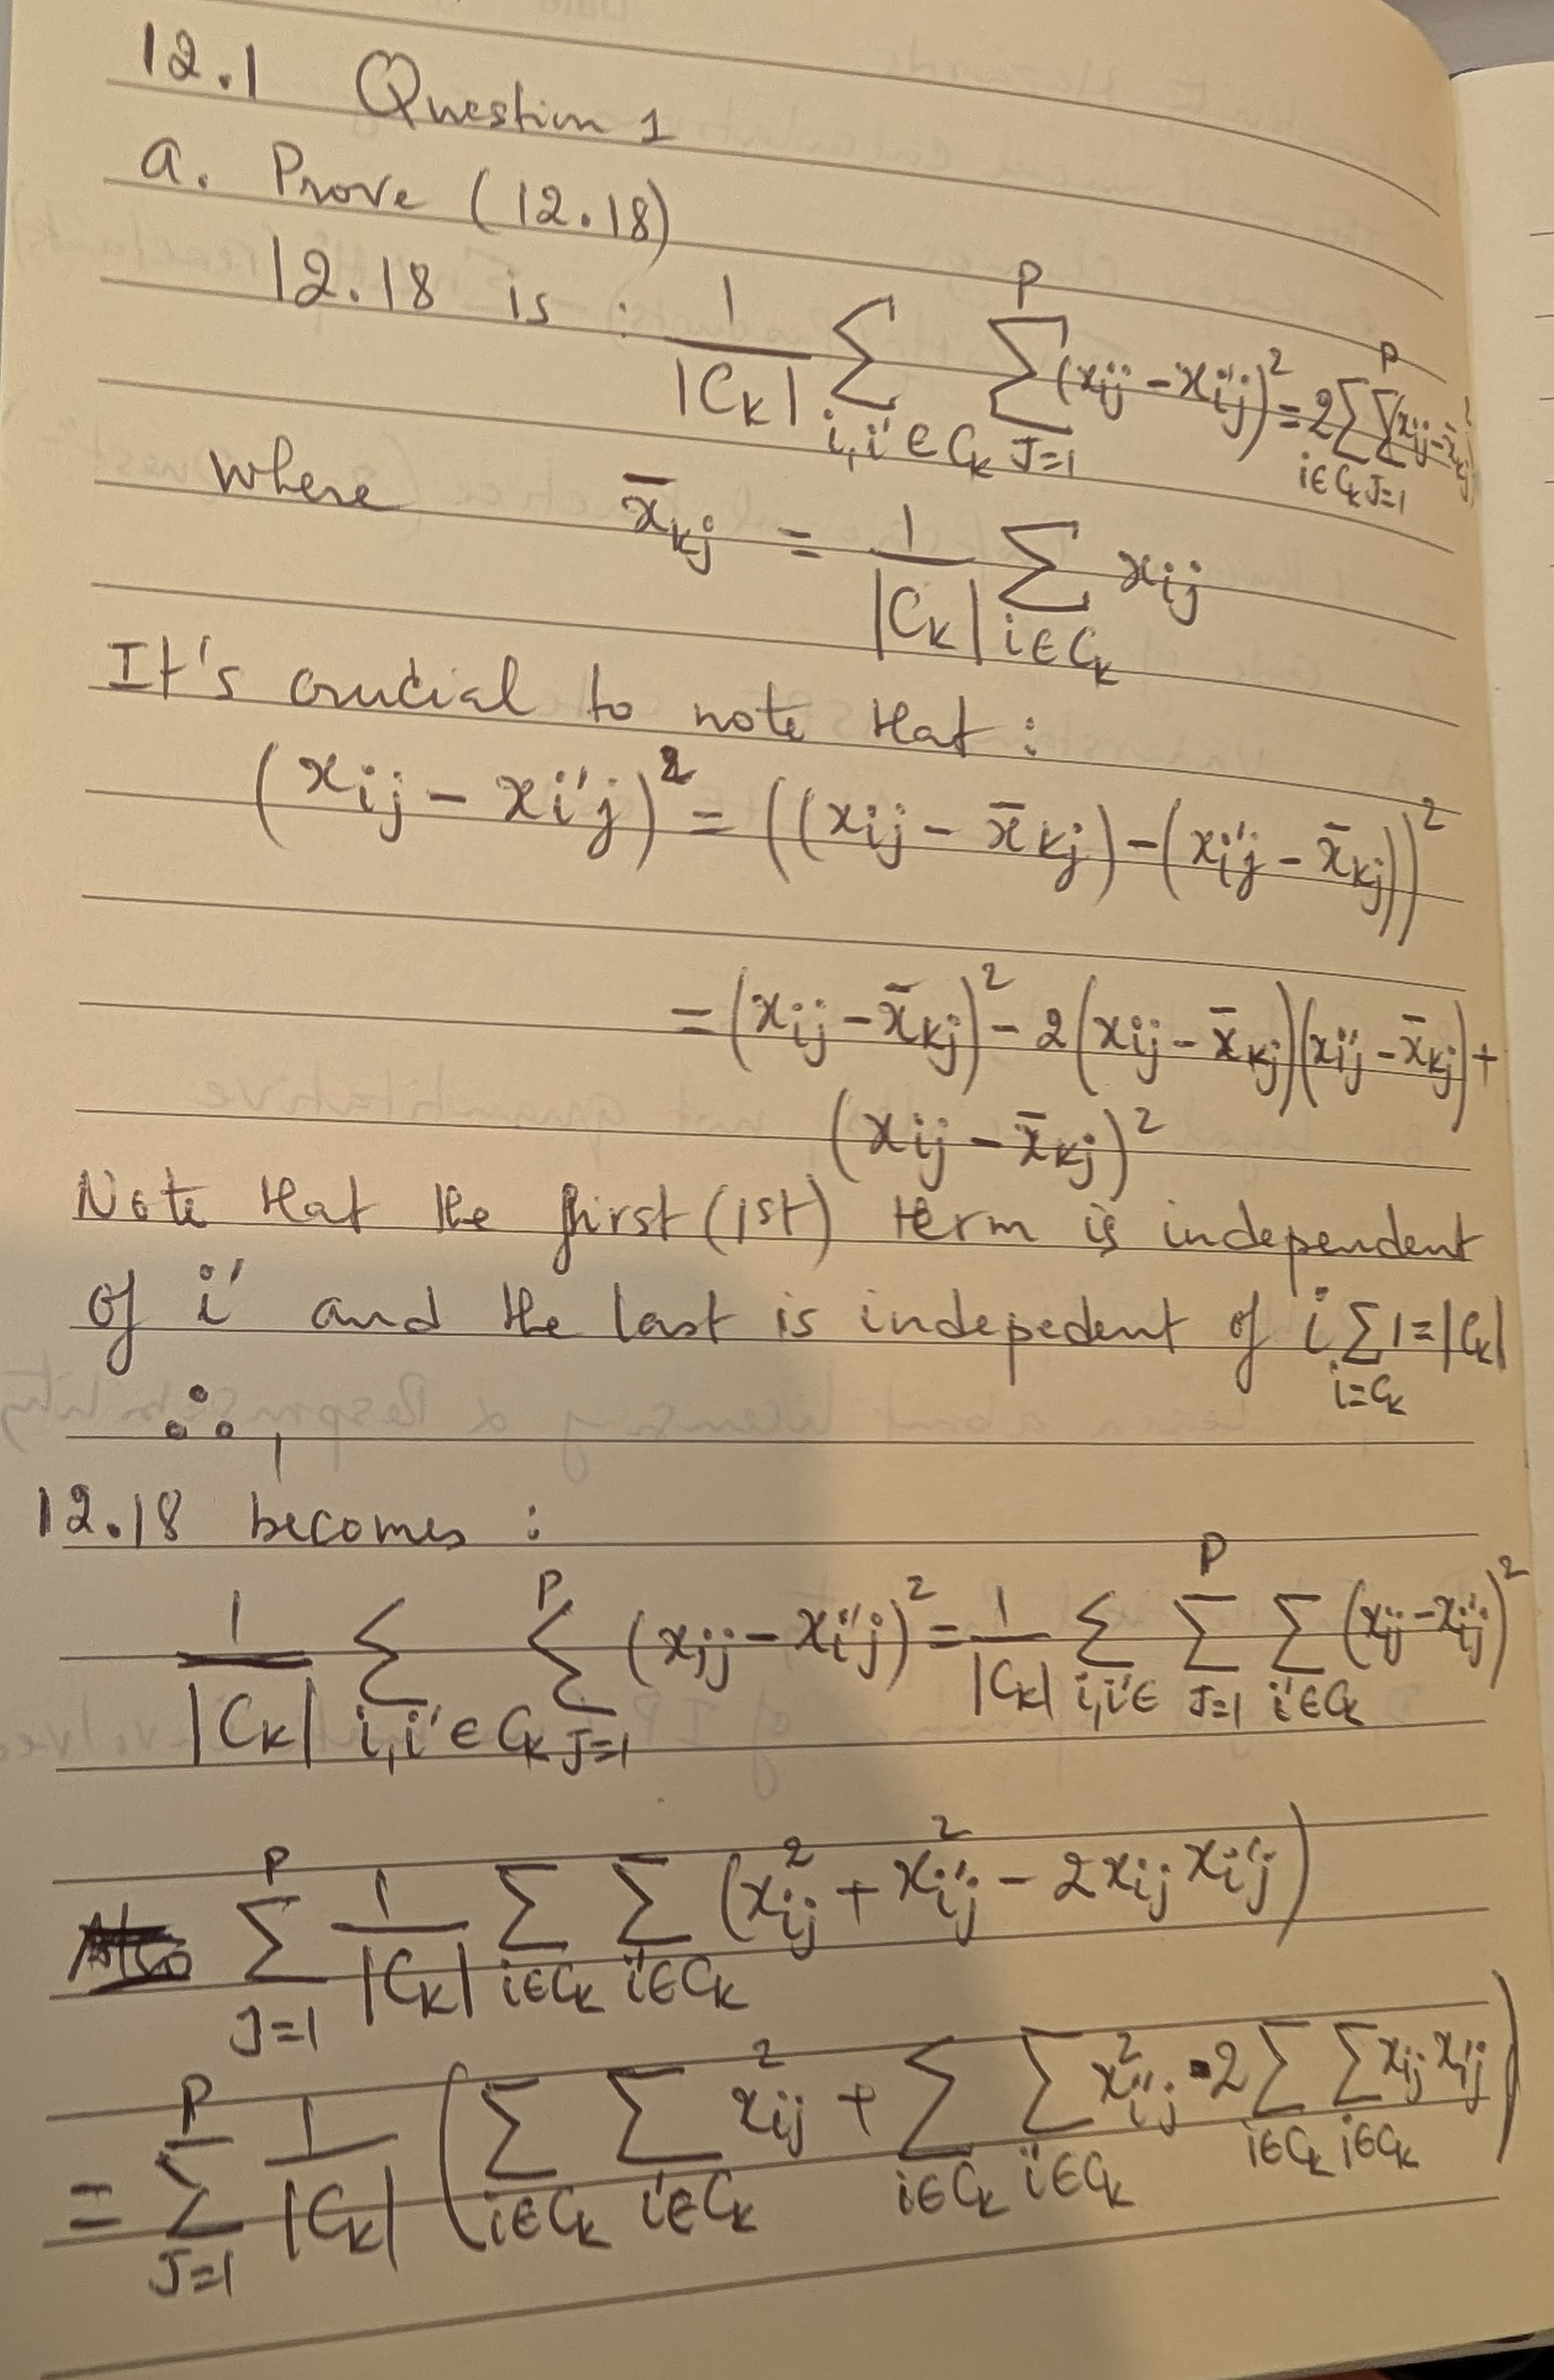

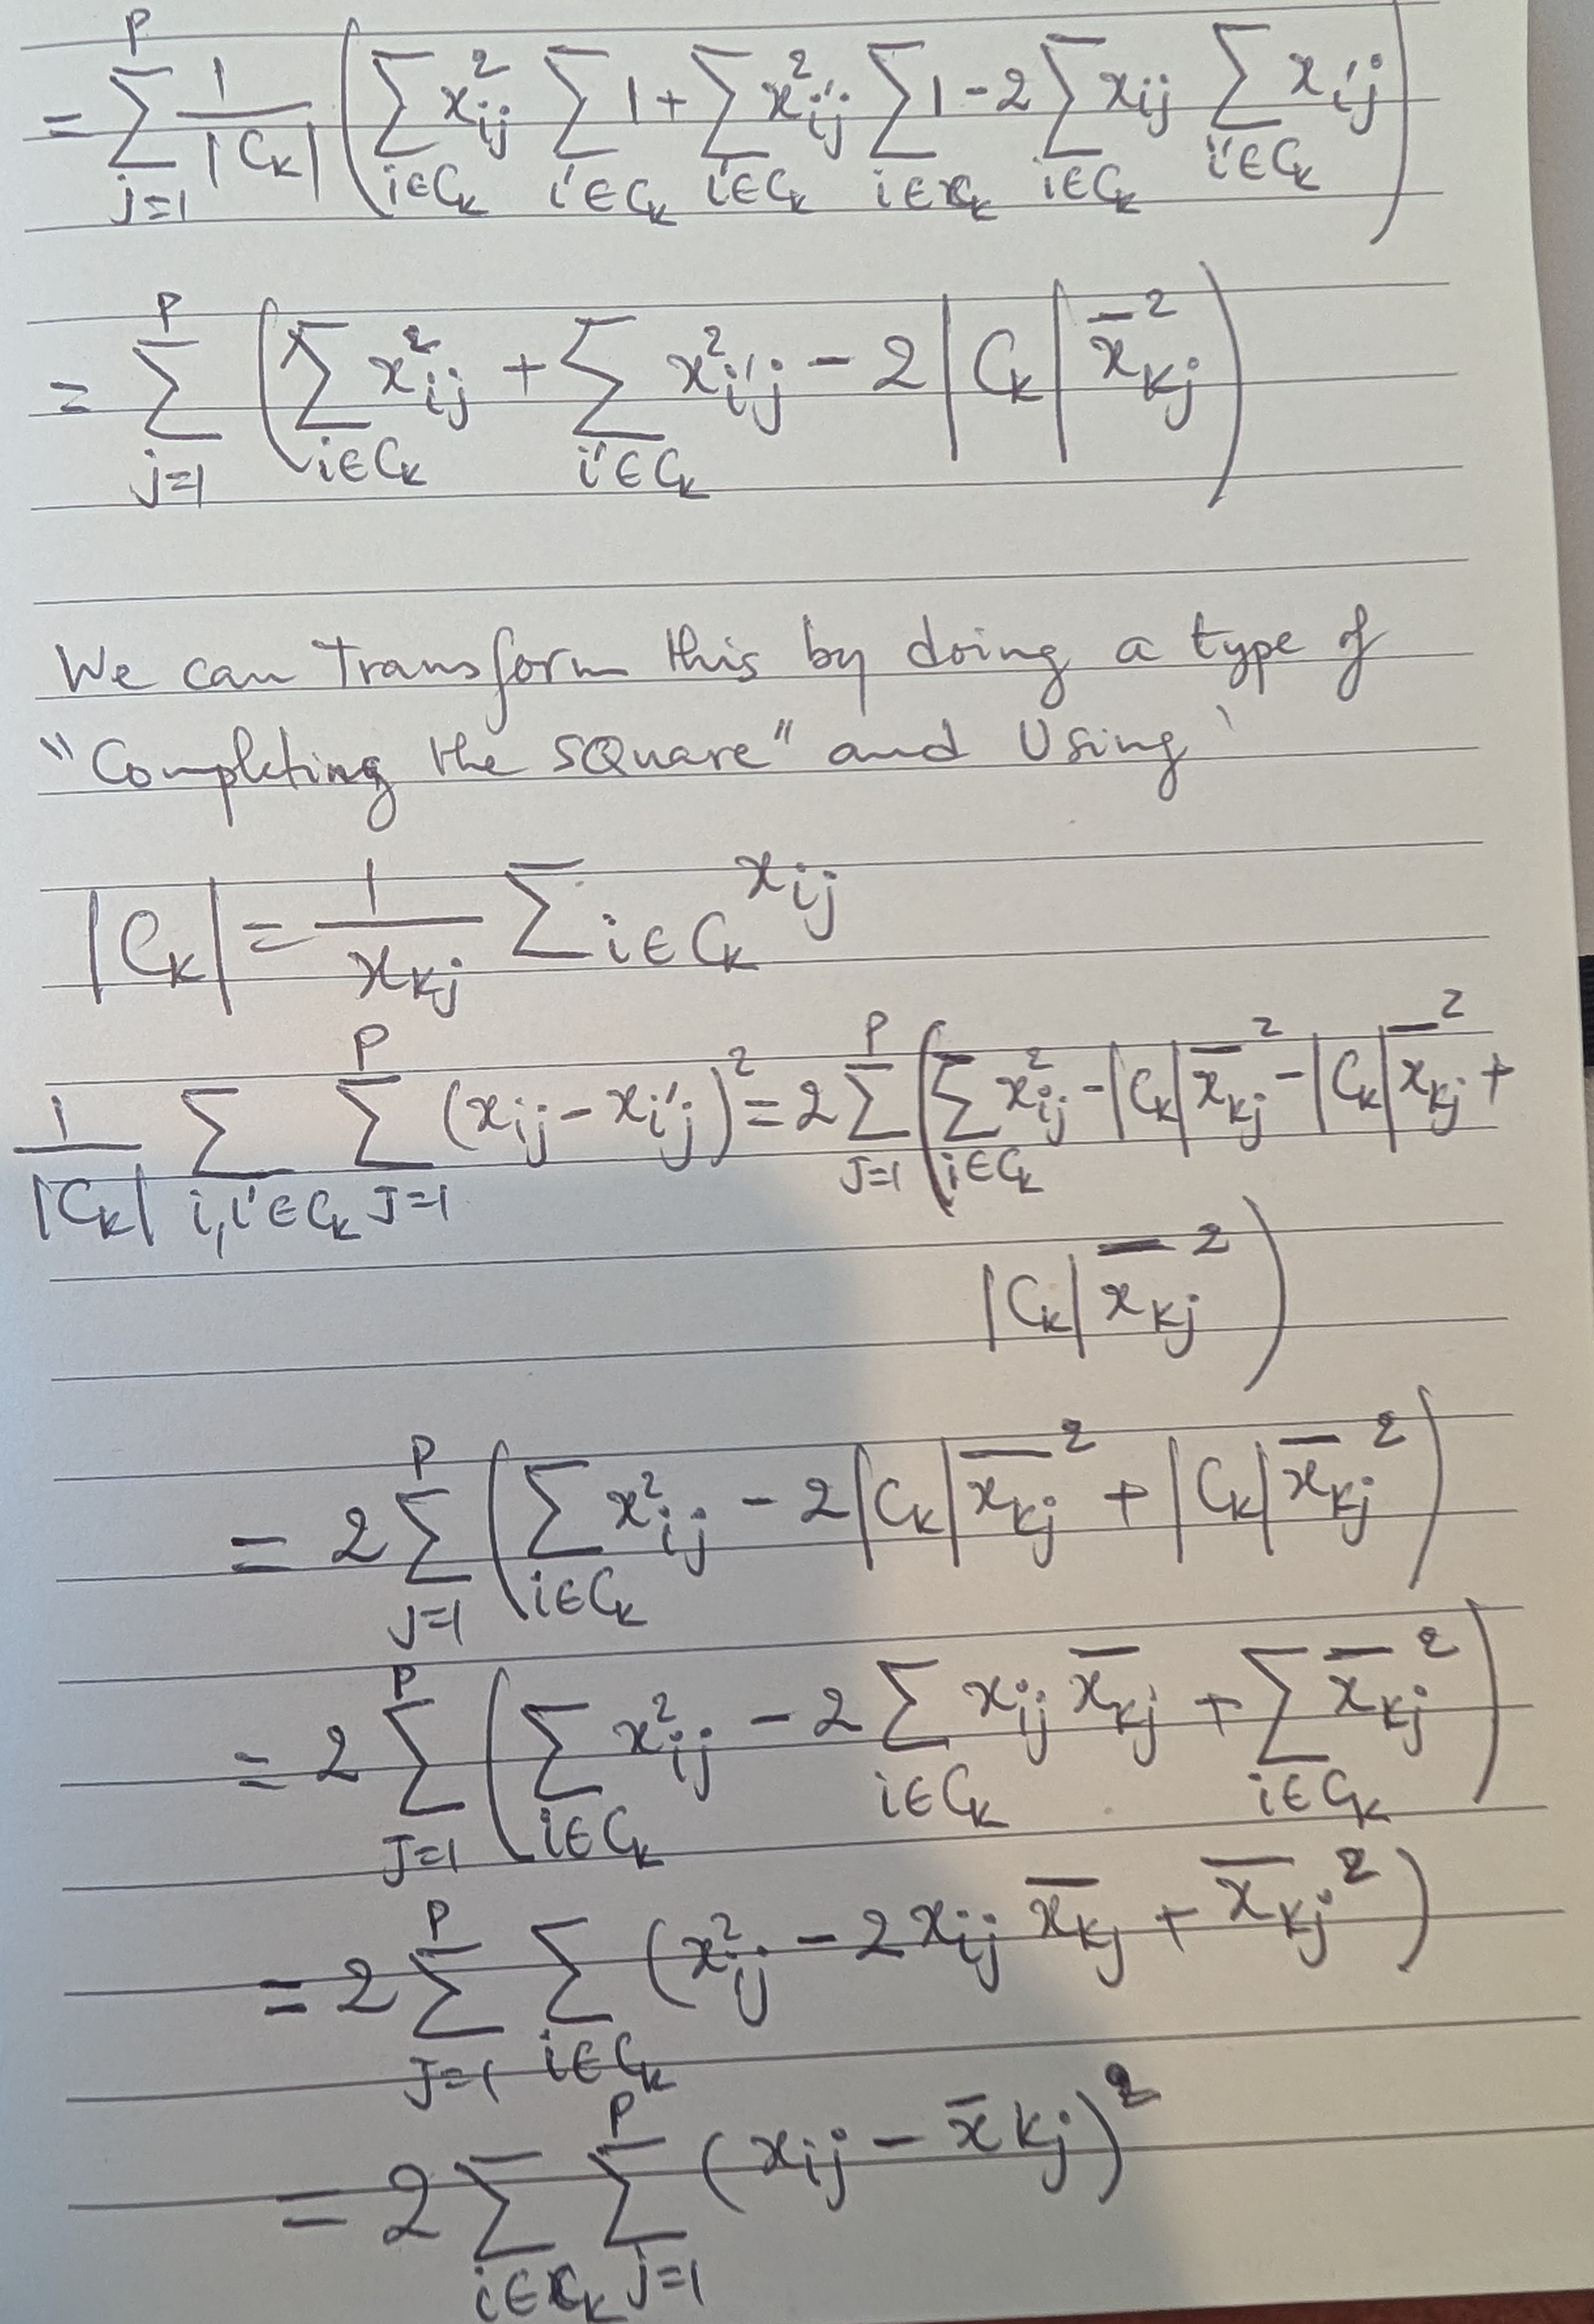

B. On the basis of this identity, argue that the  
K-means clustering algorithm (Algorithm 12.2) decreases the objective (12.17) at each iteration.
Equation 10.12 demonstrates that the euclidean distance between each possible pair of samples can be related to the difference from each sample to the mean of the cluster. The K-means algorithm works by minimizing the euclidean distance to each centroid, thus also minimizes the within-cluster variance.

### Applied Question #9 on page 554 of ISLR Python. 

### Consider the USArrests data. We will now perform hierarchical clustering on the states.

(a) Using hierarchical clustering with complete linkage and
Euclidean distance, cluster the states.

(b) Cut the dendrogram at a height that results in three distinct
clusters. Which states belong to which clusters?

(c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

(d) What efect does scaling the variables have on the hierarchical
clustering obtained? In your opinion, should the variables be
scaled before the inter-observation dissimilarities are computed?
Provide a justifcation for your answer.

In [ ]:
### (a) Hierarchical clustering with complete linkage and Euclidean distance

In [49]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# Load the USArrests dataset
df = pd.read_csv('https://raw.githubusercontent.com/jemaelnzihou/Predictive-Analysis/main/USArrestsdata.csv')

df = pd.read_csv(url, index_col=0)

#  Inspect the first few rows of the data
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Murder  Assault  UrbanPop  Rape       State
0    13.2      236        58  21.2     Alabama
1    10.0      263        48  44.5      Alaska
2     8.1      294        80  31.0     Arizona
3     8.8      190        50  19.5    Arkansas
4     9.0      276        91  40.6  California


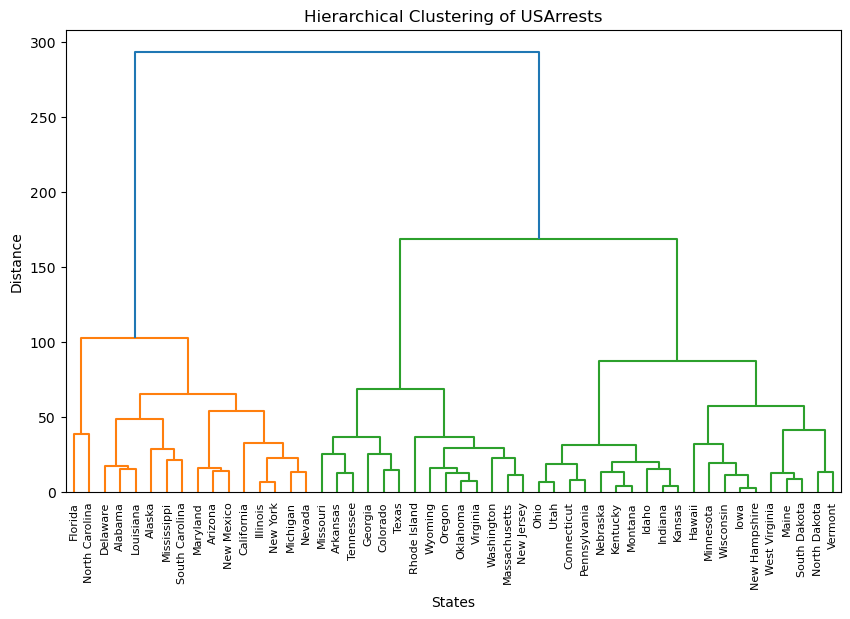

In [53]:
from scipy.cluster.hierarchy import fcluster

# If 'State' is a column, set it as index
if 'State' in df.columns:
    df.set_index('State', inplace=True)

# Check and remove any non-numeric columns (safety)
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Perform hierarchical clustering
Z = linkage(df_numeric.values, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=df_numeric.index)
plt.title('Hierarchical Clustering of USArrests')
plt.xlabel('States')
plt.ylabel('Distance')
plt.show()

# Cut the dendrogram into 3 clusters
clusters = fcluster(Z, 3, criterion='maxclust')

### Create a DataFrame showing state and its cluster

In [54]:
cluster_df = pd.DataFrame({'State': df_numeric.index, 'Cluster': clusters})

# Print the states in each cluster
for i in range(1, 4):
    states_in_cluster = cluster_df[cluster_df['Cluster'] == i]['State'].tolist()
    print(f"\nCluster {i}:")
    print(', '.join(states_in_cluster))


Cluster 1:
Alabama, Alaska, Arizona, California, Delaware, Florida, Illinois, Louisiana, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, North Carolina, South Carolina

Cluster 2:
Arkansas, Colorado, Georgia, Massachusetts, Missouri, New Jersey, Oklahoma, Oregon, Rhode Island, Tennessee, Texas, Virginia, Washington, Wyoming

Cluster 3:
Connecticut, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, Ohio, Pennsylvania, South Dakota, Utah, Vermont, West Virginia, Wisconsin


###  (c) Hierarchical Clustering after Scaling the Variables

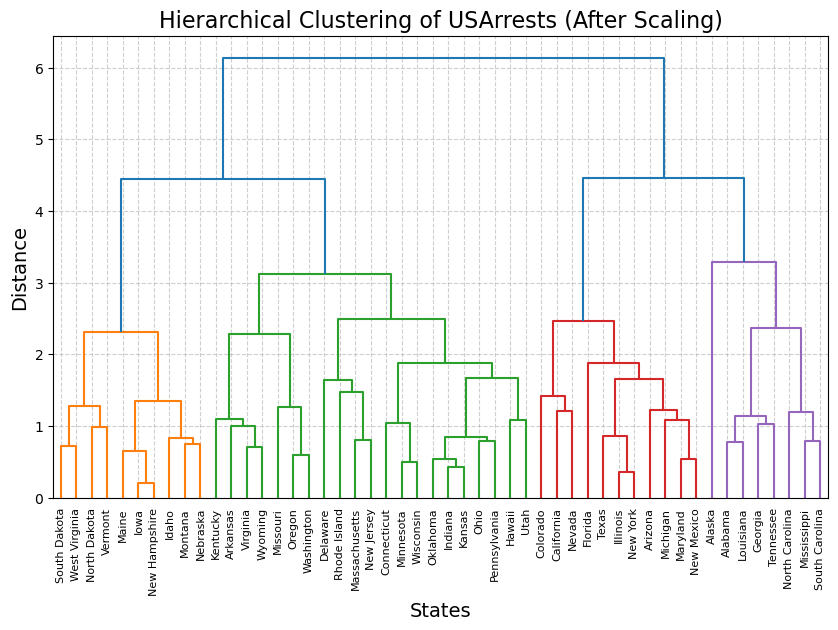

In [56]:
from scipy.cluster.hierarchy import fcluster

# Set 'State' as index
if 'State' in df.columns:
    df.set_index('State', inplace=True)

# Scale the variables to have mean 0 and standard deviation 1
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

# Perform hierarchical clustering on scaled data
Z_scaled = linkage(df_scaled.values, method='complete', metric='euclidean')

# Plot the dendrogram for the scaled data
plt.figure(figsize=(10, 6))
dendrogram(Z_scaled, labels=df_scaled.index, leaf_rotation=90)
plt.title('Hierarchical Clustering of USArrests (After Scaling)', fontsize=16)
plt.xlabel('States', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Cut the dendrogram into 3 clusters
clusters_scaled = fcluster(Z_scaled, 3, criterion='maxclust')

### Create a DataFrame showing state and its cluster after scaling

In [55]:
cluster_df_scaled = pd.DataFrame({'State': df_scaled.index, 'Cluster': clusters_scaled})

# Print the states in each cluster
for i in range(1, 4):
    states_in_cluster = cluster_df_scaled[cluster_df_scaled['Cluster'] == i]['State'].tolist()
    print(f"\nCluster {i}:")
    print(', '.join(states_in_cluster))


Cluster 1:
Alaska, Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, North Carolina, South Carolina, Texas

Cluster 2:
Iowa, Maine, New Hampshire, North Dakota, South Dakota, Vermont, West Virginia

Cluster 3:
Alabama, Arkansas, Connecticut, Delaware, Georgia, Hawaii, Idaho, Indiana, Kansas, Kentucky, Louisiana, Massachusetts, Minnesota, Missouri, Montana, Nebraska, New Jersey, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, Tennessee, Utah, Virginia, Washington, Wisconsin, Wyoming


### (d) The effect of scaling variables on hierarchical clustering:


Scaling the variables can have a significant effect on the hierarchical clustering results. When variables are on different scales, those with larger variances dominate the dissimilarity computations, potentially biasing the clustering towards those variables. Scaling the variables to have standard deviation one ensures that each variable contributes equally to the dissimilarity measure and prevents any single variable from having a disproportionate impact on the clustering outcome.

### Explanation:

it is generally recommended to scale the variables before computing inter-observation dissimilarities for hierarchical clustering. Scaling helps to ensure that all variables contribute equally and that the clustering is not biased by the scale or magnitude of the variables. By scaling, we can focus on the patterns and structures in the data rather than the absolute values of the variables. However, the decision to scale variables ultimately depends on the specific characteristics of the dataset and the research question at hand.


A. Conduct PCA to collapse correlated variables into a subset that includes 80% of the variance of the entirety of the data.   B. conduct k-means to identify clusters
C. evaluate different values for k (e.g., 3, 4,…).  
D. conduct hierarchical clustering.   
E. Investigate assumptions and Interpret all of the findings.   

### Load and Prepare the Data

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://raw.githubusercontent.com/jemaelnzihou/Predictive-Analysis/main/wine-clustering.csv"
df = pd.read_csv(url)

# Inspect the dataset
print(df.head())

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

C:\Users\jemae\Anaconda_Jupyter\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [ ]:
### Check the type of column that type in the dataset

In [2]:
# Display column data types
print(df.dtypes)

# Optionally, filter non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("\nNon-numeric columns:", list(non_numeric_columns))

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

Non-numeric columns: []


Since all columns in the dataset are numeric, we don’t need to drop any columns before applying PCA or scaling.

### Standard Scaling and PCA (retain 80% variance)


Number of components to retain ≥80% variance: 5


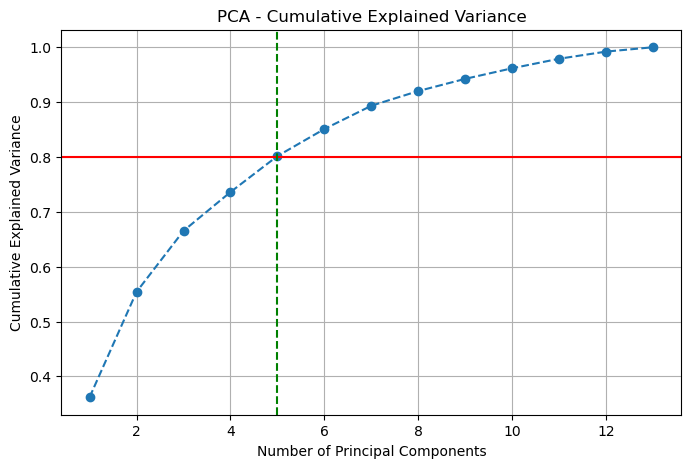

In [18]:
# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Calculate cumulative explained variance
cum_var = pca.explained_variance_ratio_.cumsum()

# Find number of components for 80% variance
n_components_80 = (cum_var >= 0.80).argmax() + 1
print(f"\nNumber of components to retain ≥80% variance: {n_components_80}")

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.axvline(x=n_components_80, color='g', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

### Insights & explanation

What PCA did was the transformation of the original variables (which may have been highly correlated) into a smaller set of uncorrelated variables called principal components.

The the question is , Why do we scale the data? well, when it comes to standardization, it is necessary because PCA is sensitive to the scale of the data.

This explained the variance with just the first 5 principal components, we preserved at least 80% of the original data's information. this is amazing.

Furthermore, the dimensionality reduction is crucial because, instead of using all 13+ features (typical for wine datasets), we can reduce the dataset to 5 dimensions—making clustering (e.g., KMeans) more efficient and robust. whic was done in our case.

why do we care? For visual benefit, which can now help us use the first 2 or 3 components for visualization without losing much interpretability.

### K-Means Clustering on PCA-Transformed Data

Now that we've reduced the dataset using PCA, let's proceed to perform K-Means clustering on the PCA-transformed data. We'll:

Use the number of components needed to retain ≥80% variance (as found earlier).

Fit K-Means for a range of cluster counts (e.g., k = 2 to 8).

Plot the Elbow curve and Silhouette scores to help determine the optimal number of clusters.

Assign clusters to the data and interpret the results.

In [33]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance:\n", pca.explained_variance_)
print("PCA Components:\n", pca.components_)

Explained Variance:
 [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
PCA Components:
 [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]
 [-0.0178563   0.53689028 -0.21417556  0.06085941 -0.35179658  0.19806835
   0.15229479 -0.20330102  0.39905653  0.06592568 -0.42777141  0.18412074
  -0.23207086]
 [-0.26566365  0.03521363 -0.14302547  0.06610294  0.72704851 -0.14931841
  -0.10902584 -0.50070298  0.13685982 -0.07643678 -0.17361452 -0.10116099
  -0.1578688 ]


In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Load Data
url = "https://raw.githubusercontent.com/jemaelnzihou/Predictive-Analysis/main/wine-clustering.csv"
df = pd.read_csv(url)

# 2. Preprocess: Drop non-numeric or class columns if present
features = df.select_dtypes(include=[np.number])
scaled_data = StandardScaler().fit_transform(features)

# 3. PCA: Determine n_components for 80% variance
pca = PCA()
pca.fit(scaled_data)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1

# 4. Apply PCA with enough components to cover 80% variance
pca_80 = PCA(n_components=n_components_80)
pca_data = pca_80.fit_transform(scaled_data)

# 5. K-Means clustering with k from 2 to 8
K = range(2, 9)
inertias = []
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pca_data)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, labels))

# 6. Plot Elbow Method and Silhouette Score
plt.figure(figsize=(12, 5))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bo--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method')

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'go--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()

# 7. Final KMeans with optimal k (assume k=3 based on plots)
optimal_k = 3
final_kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
final_labels = final_kmeans.fit_predict(pca_data)

# 8. Visualize KMeans Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=final_labels, palette='Set1')
plt.title(f"KMeans Clusters (k={optimal_k})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

# 9. Hierarchical Clustering
linkage_matrix = linkage(pca_data, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Optional: Agglomerative Clustering labels
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(pca_data)

# Visualize Agglomerative Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=agglo_labels, palette='Set2')
plt.title("Agglomerative Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

# 10. Assumption checks & interpretation
print(f"\nPCA components selected: {n_components_80}")
print(f"Total variance retained: {cumulative_variance[n_components_80-1]:.2f}")
print(f"KMeans silhouette score (k={optimal_k}): {silhouette_score(pca_data, final_labels):.2f}")

AttributeError: 'NoneType' object has no attribute 'split'

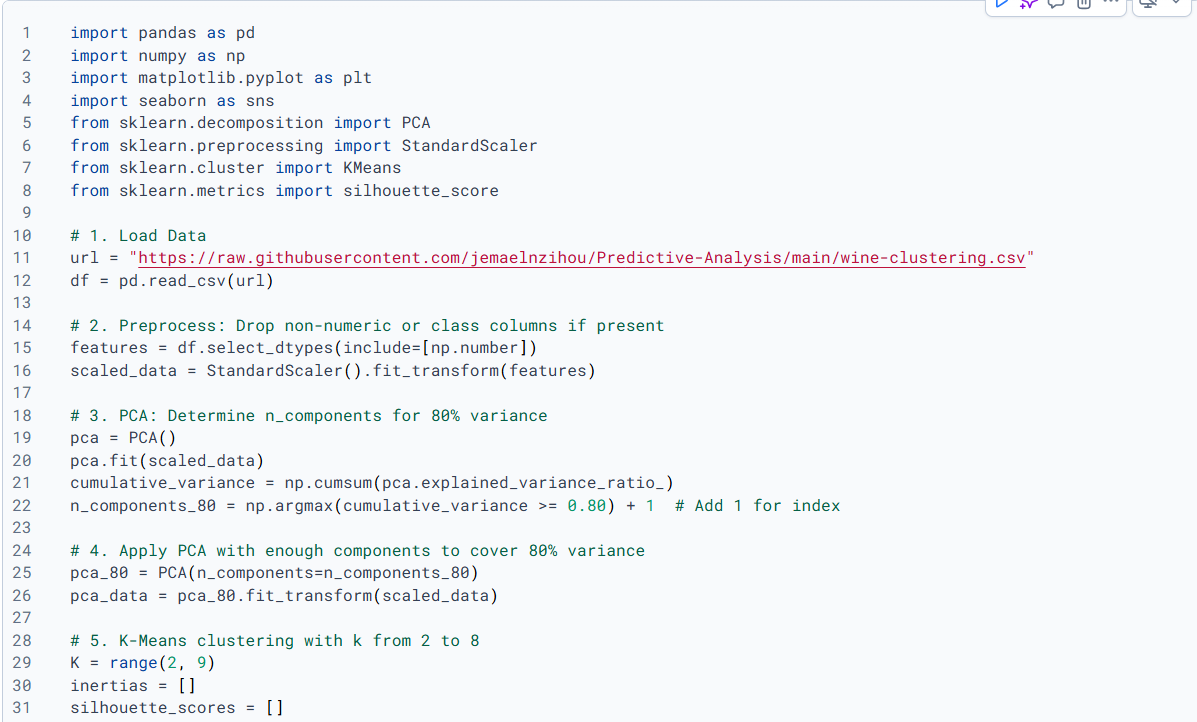

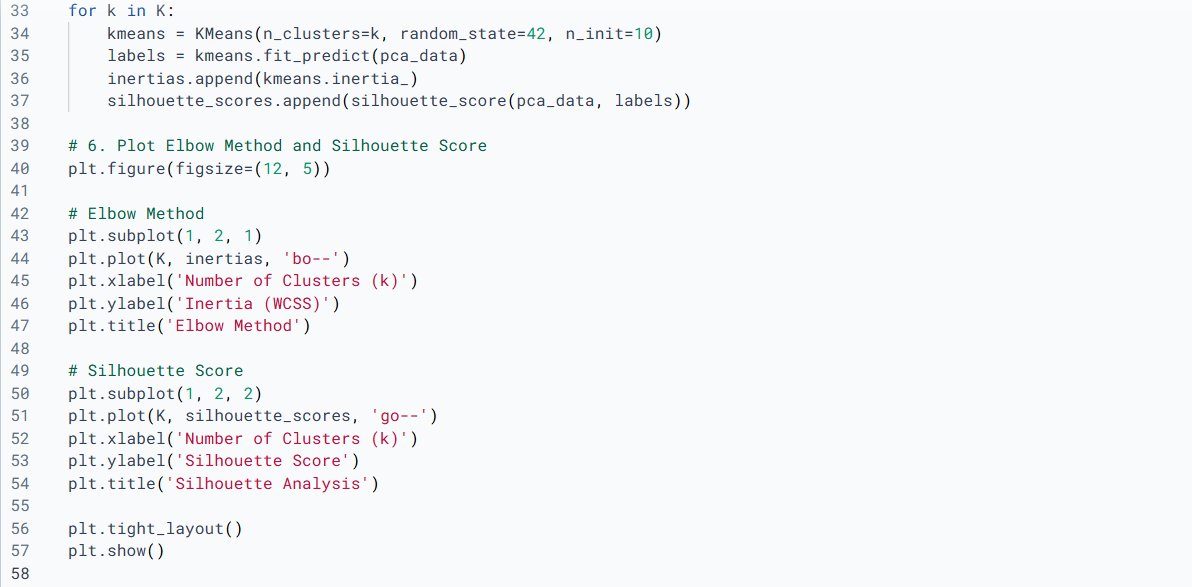

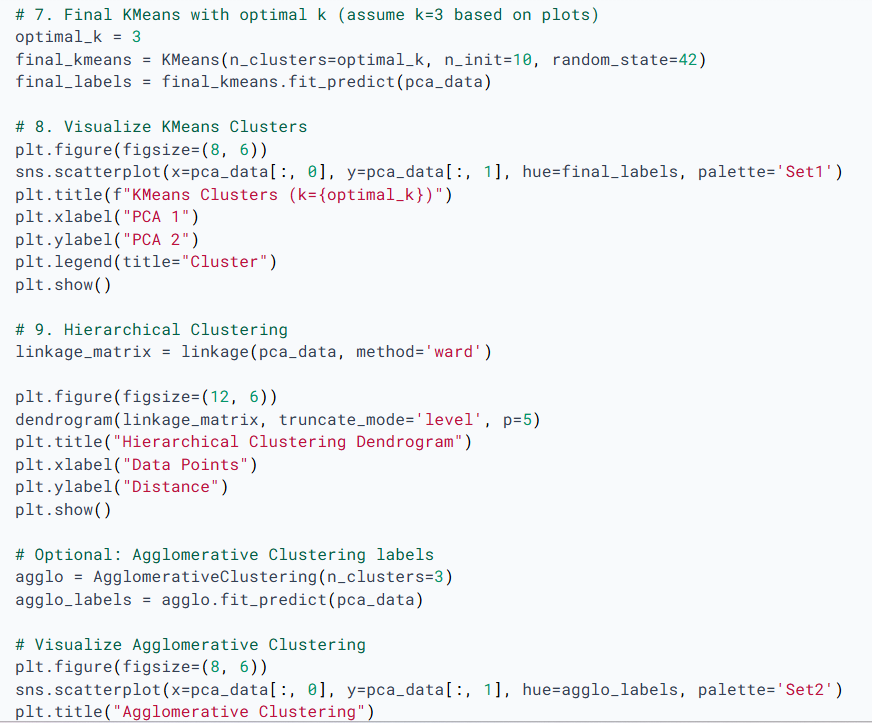

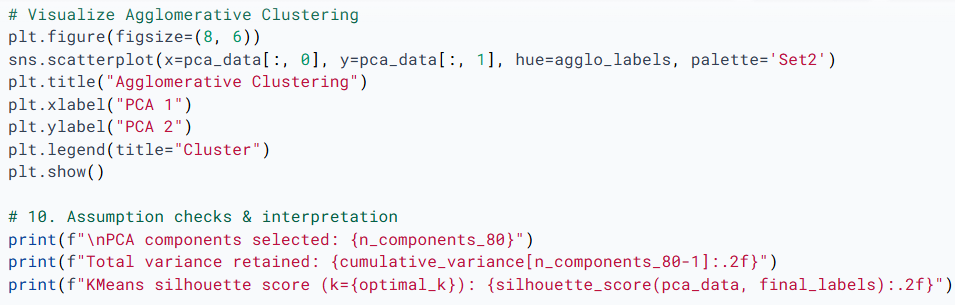

This code was run in deepnote just because my PC version of scikit-learn 1.6.1 and numpy 2.2.5 are recent alpha or pre-release versions, and some internal dependencies like OpenBLAS may not be fully stable across platforms. Also, these version are very new, and while they include performance improvements, they may also introduce instability or compatibility issues — especially on Windows or in older environments. This is why the alternative of Deepnote was used to reach the following outcome.

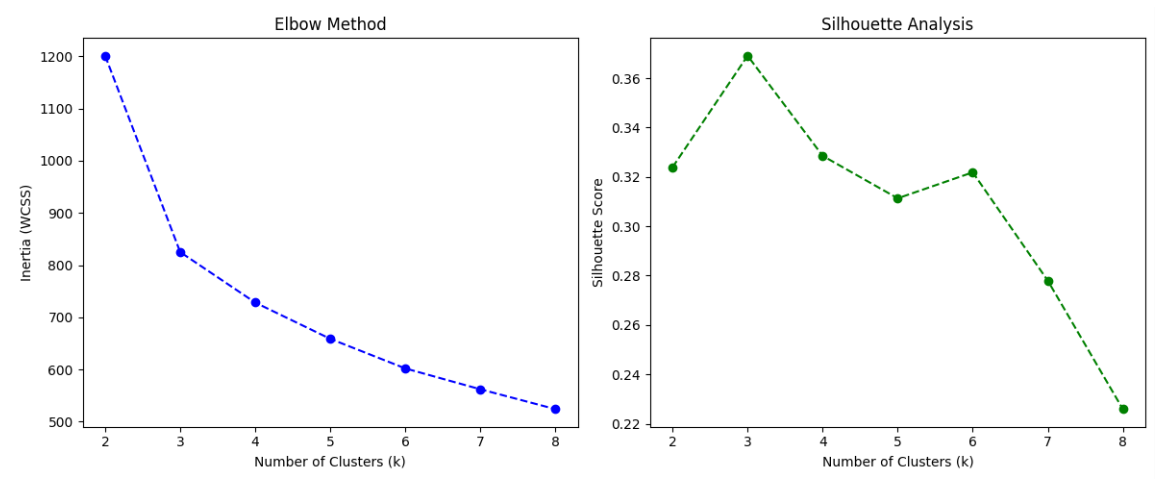

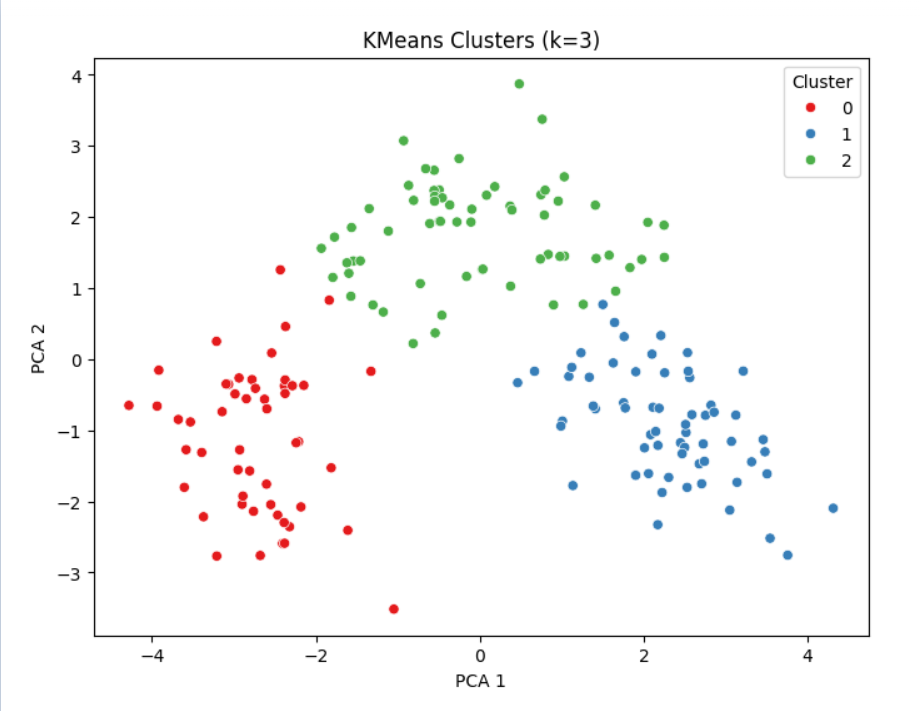

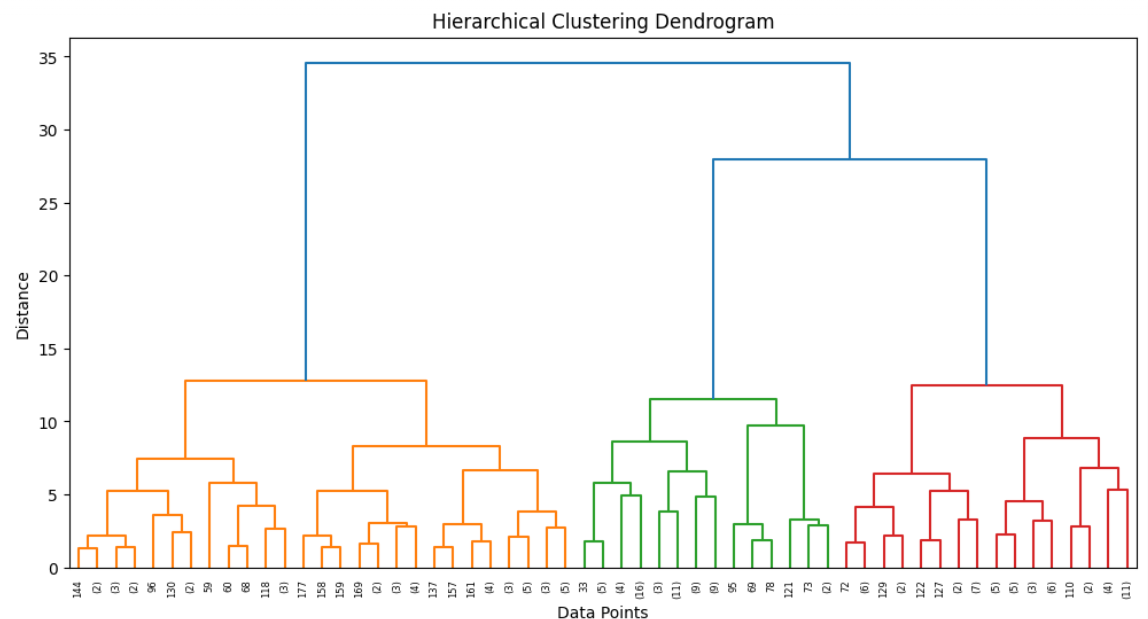

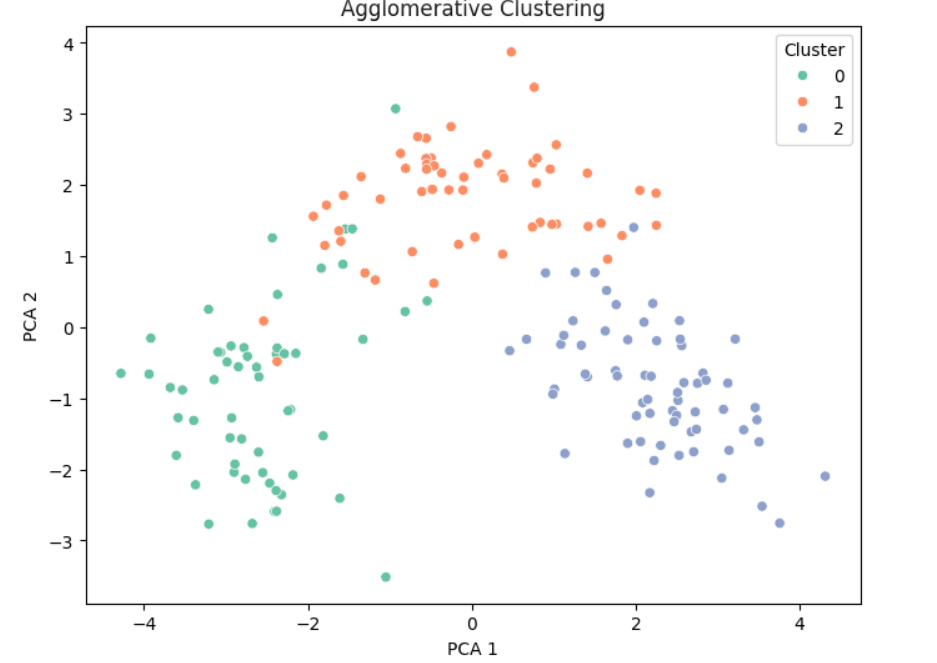

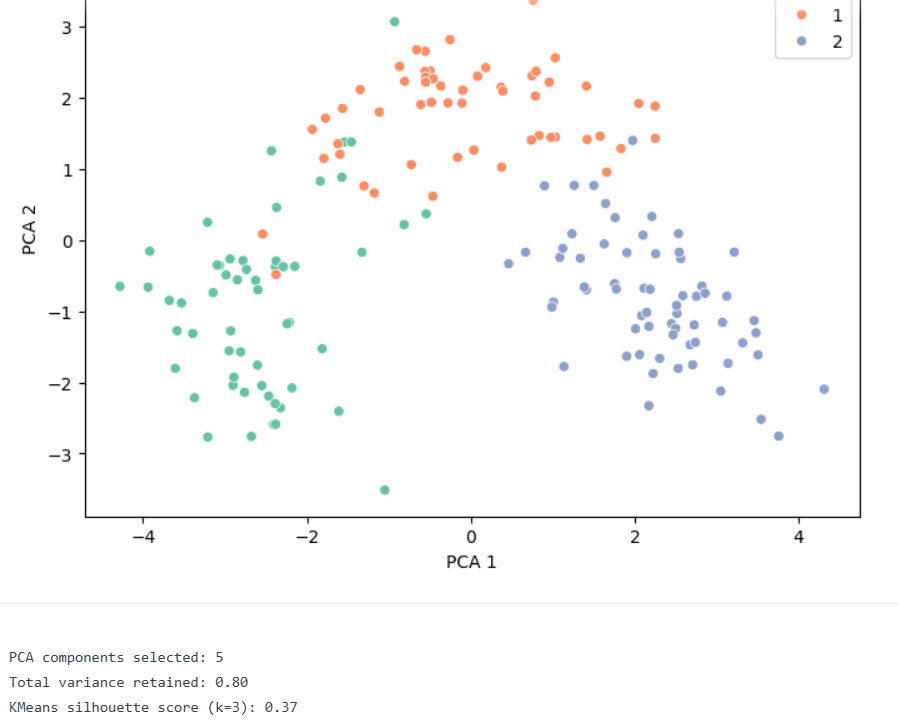

### Conclusion

(a) Hierarchical clustering with complete linkage and Euclidean distance can be performed on the USArrests data using the scipy library in Python.

(b) The dendrogram can be cut at a specific height to create three distinct clusters, and the states can be assigned to their respective clusters using the fcluster function.

(c) Scaling the variables to have standard deviation one before hierarchical clustering can have a significant effect on the results and helps prevent bias from variables with larger variances.

(d) Scaling the variables is generally recommended for hierarchical clustering to ensure equal contribution from each variable and focus on the data patterns rather than absolute values. However, the decision to scale depends on the dataset and research question.

### references
de Amorim, R. C., & Makarenkov, V. (2021). Improving cluster recovery with feature rescaling factors. Applied Intelligence, 51(8), 5759–5774. https://doi.org/10.1007/s10489-020-02108-1 (de Amorim & Makarenkov, 2021)

Raymaekers, Jakob, and Ruben H Zamar. “Pooled Variable Scaling for Cluster Analysis.” Bioinformatics, vol. 36, no. 12, 13 Apr. 2020, pp. 3849–3855, https://doi.org/10.1093/bioinformatics/btaa243.(Raymaekers and Zamar)

Alzahrani, Ali Rashash R. “Impact of Dataset Scaling on Hierarchical Clustering: A Comparative Analysis of Distance-Based and Ratio-Based Methods.” International Journal of Analysis and Applications, vol. 22, 27 Feb. 2024, p. 36, https://doi.org/10.28924/2291-8639-22-2024-36. (Alzahrani)

https://raw.githubusercontent.com/jemaelnzihou/Predictive-Analysis/main/USArrestsdata.csv
https://github.com/jemaelnzihou/Predictive-Analysis/blob/main/1000044047.jpg (Conceptual Q1 Picture 1)
https://github.com/jemaelnzihou/Predictive-Analysis/blob/main/1000044049.jpg (Conceptual Q1 Picture 2)
